# Introduction

Hello! I decided to write this notebook as a guide for people starting out in the field of Machine Learning. It is meant for beginners and is part of a small presentation I was planning on doing for my university. It includes a lot of information and comments starting with an exploratory data analysis (EDA) on our dataset and finishing with creating a variety of prediction models for our target variable, which will be the GPA of a student.

Feel free to leave an upvote if this notebook helped you, a comment in the discussions section if you have any further questions or you want to correct me on anything that was wrong or just chat.

# Imports and Data Loading

In [1]:
# Warning suppresion
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='tensorflow')
warnings.filterwarnings('ignore', category=FutureWarning, module='seaborn')
#warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn._oldcore")

In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import spearmanr
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import tensorflow as tf
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

2024-07-31 20:08:06.637241: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-31 20:08:06.637405: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-31 20:08:06.887219: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
# Data Loading
students = pd.read_csv("/kaggle/input/students-performance-dataset/Student_performance_data _.csv")

# Exploratory Data Analysis (EDA)

## Looking at numbers

In [4]:
students.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


Below with the `.info()` command we can check any kind of information about the dataset and its variables. 

In [5]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


We notice that we have 2392 entries (data points) and 15 columns (variables). We also notice the type the data in each column (variable) is stored as. For example Age values are stored as an integer and GPA values are stored as a float. In general, we want to have only numerical values (int/float) for our machine learning modeling stage and not 'object' type variables. If any object dtype variables are present further steps are required before we go into modeling stage using encoding or transformation techniques. In our case though, all of our dataset variables are numerical so we continue on with our EDA.

Next we check for missing values. It is very important to know if our dataset contains null (NaN) values on any variables. Any attempt to make machine learning models with null values present will result in failure. In order to deal with this problem various techniques can be employed ranging from straight up dropping the data points with the missing variable values (accepting that we might lose the value those data points hold), filling with the mean / most common value on that variable (this is a very common approach) or even doing further analysis to determine subgroups within the data and unveiling patterns, which would give us an idea of what the missing values could be (this is usually giving the best results but also is the most difficult and time consuming process).

In [6]:
students.isna().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

We notice that the NaN sums for every variable is 0, meaning that we do not have any missing values.

Another step in our EDA is to check for unique values. This gives us an idea of how many unique values we have corresponding to each variable. 

In [7]:
students.nunique(axis=0)

StudentID            2392
Age                     4
Gender                  2
Ethnicity               4
ParentalEducation       5
StudyTimeWeekly      2392
Absences               30
Tutoring                2
ParentalSupport         5
Extracurricular         2
Sports                  2
Music                   2
Volunteering            2
GPA                  2371
GradeClass              5
dtype: int64

We can also check the unique values of each variable with `.unique()` method which gives us these values in an array.

In [8]:
students['ParentalEducation'].unique()

array([2, 1, 3, 4, 0])

A very useful method in EDA is `.describe()`. This gives us statistical information for our numerical columns (careful here since this only works for numerical and not object type variables) like mean, standard deviation, max / min and quartile information. It can be used to notice the presence of blatant outliers on the min and max values, understand the distribution of the data using the quartiles or detect possible skeweness by comparing mean and median (50% quartile) etc.

In [9]:
students.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


We can use the `.value_counts()` method to list the unique value counts of a variable. This for example could help us to determine if a variable is biased towards specific values or not.

In [10]:
age = students['Age'].value_counts();age

Age
15    630
16    593
17    587
18    582
Name: count, dtype: int64

## Visualizations

Looking at numbers is great but nothing speaks better than visualizations. From simple graphs to more elaborate ones, all of them contribute to a better understanding of the distributions, counts and correlations in our data variables. Using visualizations, we can communicate findings more intuitively and in a more eye pleasing way that even people not related in the field can understand.

We can use a simple pie chart to showcase the above age counts.

<Axes: ylabel='count'>

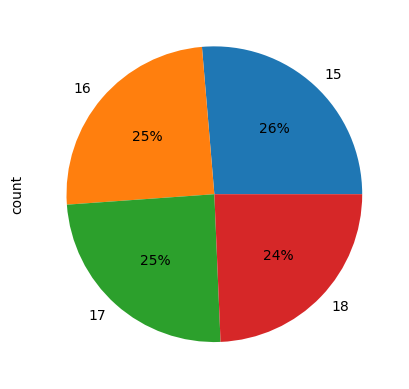

In [11]:
age.plot( kind='pie', autopct='%1.0f%%')

Same below we use a bar chart to showcase the Gender counts

<Axes: xlabel='Gender'>

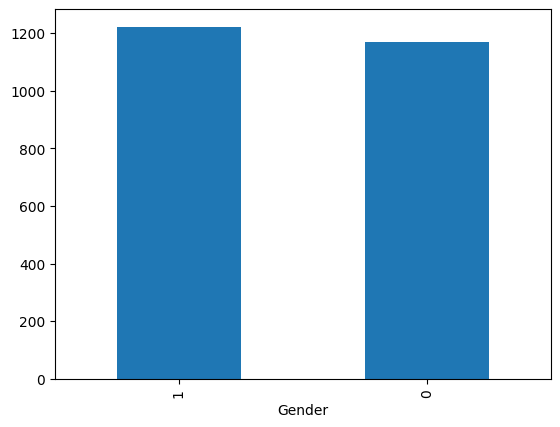

In [12]:
#df['Gender'].value_counts()
students['Gender'].value_counts().plot( kind='bar') 

We can also use histograms to plot the frequencies of numerical data, providing a clear view of the distribution of values within each variable. Histograms help us see how data is spread, identify common ranges, and detect any skewness or unusual patterns. They are particularly useful for spotting outliers and understanding the underlying distribution, whether it's normal, bimodal, or skewed.

<Axes: title={'center': 'Absences'}, ylabel='Frequency'>

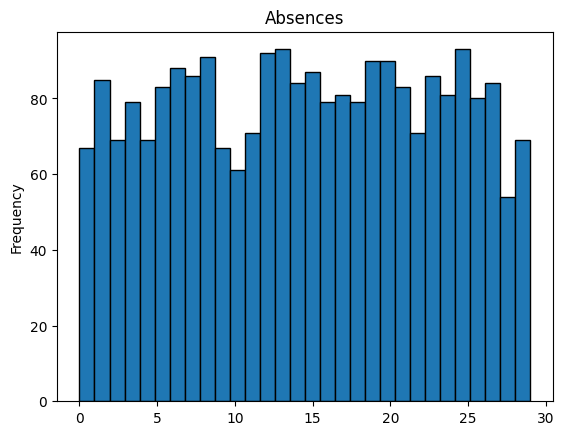

In [13]:
students['Absences'].plot( kind='hist', bins=30, edgecolor='black', title= 'Absences')

<Axes: title={'center': 'StudyTimeWeekly Density'}, ylabel='Frequency'>

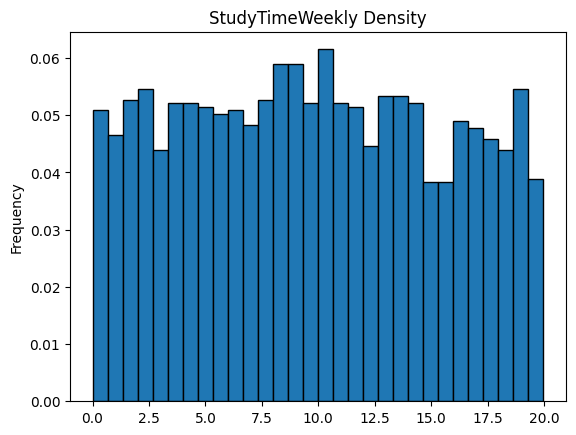

In [14]:
students['StudyTimeWeekly'].plot( kind='hist', bins=30, density = True, 
                                 edgecolor='black', title= 'StudyTimeWeekly Density')

Notice the `density = True` turns the graph from simple count of datapoints in each bin to a probability density function graph.

Now let's do some digging. We want to find how students are doing based on this dataset. We can check the value counts of the `GradeClass` variable to see how many students belong in each bracket.

In [15]:
students['GradeClass'].value_counts()

GradeClass
4.0    1211
3.0     414
2.0     391
1.0     269
0.0     107
Name: count, dtype: int64

Looks like a really big portion of students belongs to class 4 while only a small amount of students belongs to class 1.

Keep in mind that GradeClass is structured as:

GradeClass: Classification of students' grades based on GPA:
- 0: 'A' (GPA >= 3.5)
- 1: 'B' (3.0 <= GPA < 3.5)
- 2: 'C' (2.5 <= GPA < 3.0)
- 3: 'D' (2.0 <= GPA < 2.5)
- 4: 'F' (GPA < 2.0)

So the highest grades are on the lower number on this scale. This will come into play later on in our analysis when we need to make verdict on correlation.

Below we can see a more elaborate pie chart with more parameters to make it more aesthetically pleasing and provide more information like percentages.


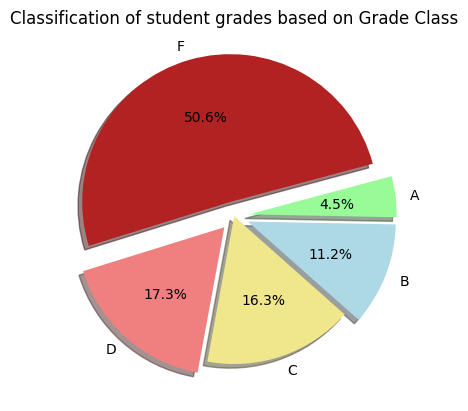

In [16]:
plt.pie(
    students['GradeClass'].value_counts(),
    labels=['F','D','C','B','A'],
    autopct="%1.1f%%",
    startangle=15,
    shadow=True,
    colors=["firebrick", "lightcoral", "khaki","lightblue","palegreen"],
    explode=(0.1, 0.1, 0, 0.1, 0.1),
)
plt.title('Classification of student grades based on Grade Class')
plt.show()

We notice that 50.6% of students has a GPA lower than 2.0 while only 15.7% has a GPA higher than 3.0 This is concerning but what is the cause of this effect? This is a question that will most likely haunt you pretty frequently in this field. Let's start digging more into it.

## Correlations

One thing we can do is look at box plots. Box plots provide a visual summary of the data, showing the median, quartiles, and potential outliers. By plotting GPAs using box plots, we can compare the distributions across different groups, such as gender, age, ethinicity or parental support. This allows us to identify any significant variations or patterns that may explain the discrepancies in GPA distribution. Additionally, box plots can highlight the presence of outliers that might be affecting the overall analysis, and provide a clear view of the median GPA for each group. After examining the box plots, we will investigate any patterns or correlations that emerge in more detail to better understand the underlying causes of this trend.

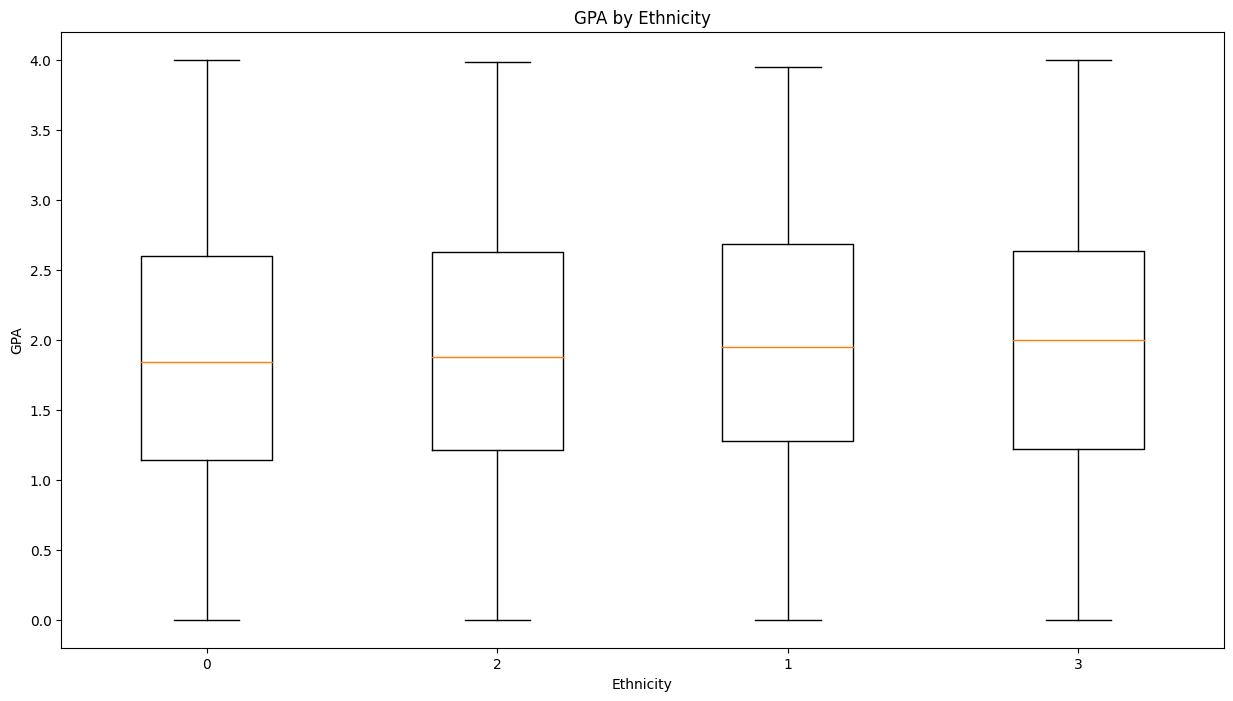

In [17]:
plt.figure(figsize=(15, 8))
box = plt.boxplot([students[students['Ethnicity'] == level]['GPA'] 
                   for level in students['Ethnicity'].unique()],
                  labels=students['Ethnicity'].unique())
plt.title('GPA by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('GPA')
plt.show()

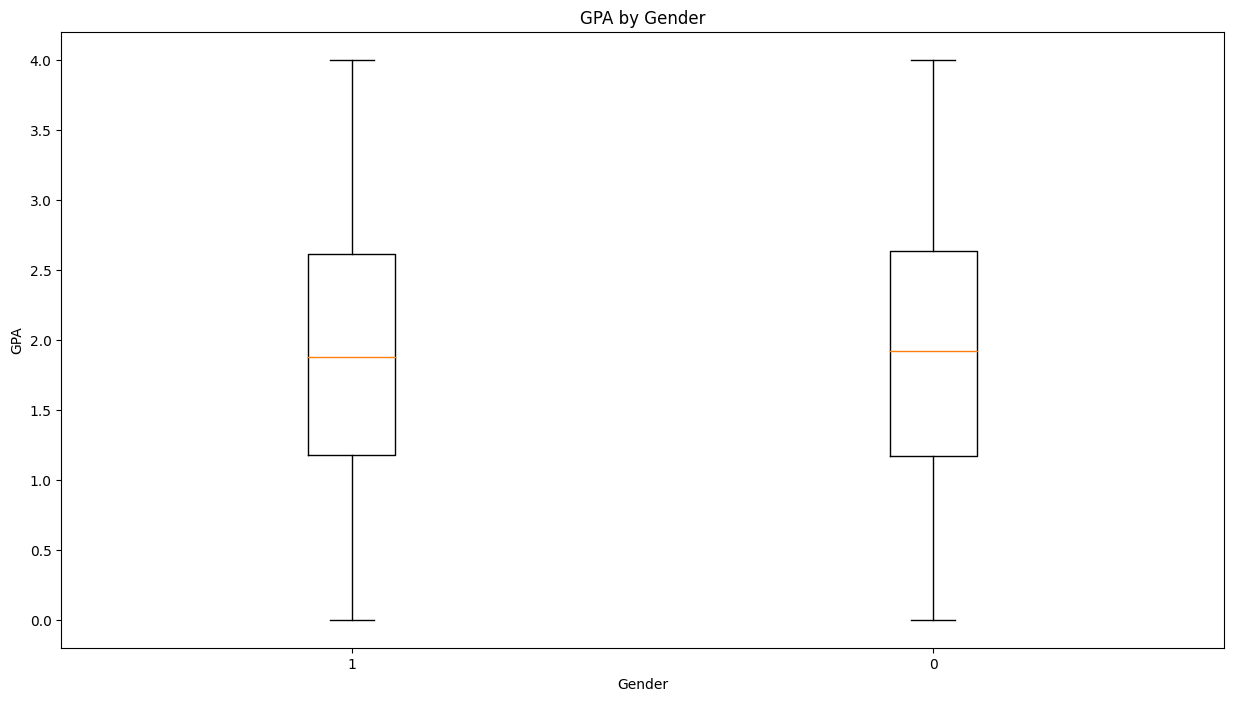

In [18]:
plt.figure(figsize=(15, 8))
box = plt.boxplot([students[students['Gender'] == level]['GPA'] 
                   for level in students['Gender'].unique()],
                  labels=students['Gender'].unique())
plt.title('GPA by Gender')
plt.xlabel('Gender')
plt.ylabel('GPA')
plt.show()

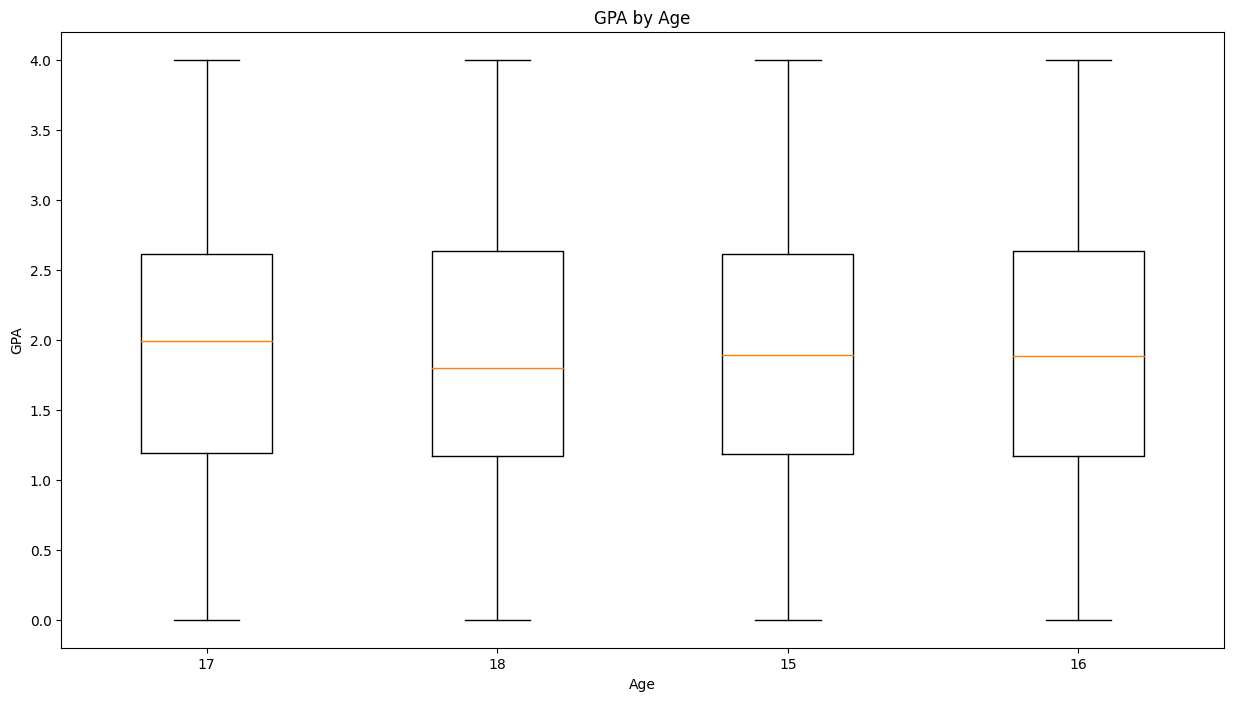

In [19]:
plt.figure(figsize=(15, 8))
box = plt.boxplot([students[students['Age'] == level]['GPA'] 
                   for level in students['Age'].unique()],
                  labels=students['Age'].unique())
plt.title('GPA by Age')
plt.xlabel('Age')
plt.ylabel('GPA')
plt.show()

We are not noticing anything peculiar so far. The box plots for different values seem fairly consistent. Additionaly we do not notice any outliers.

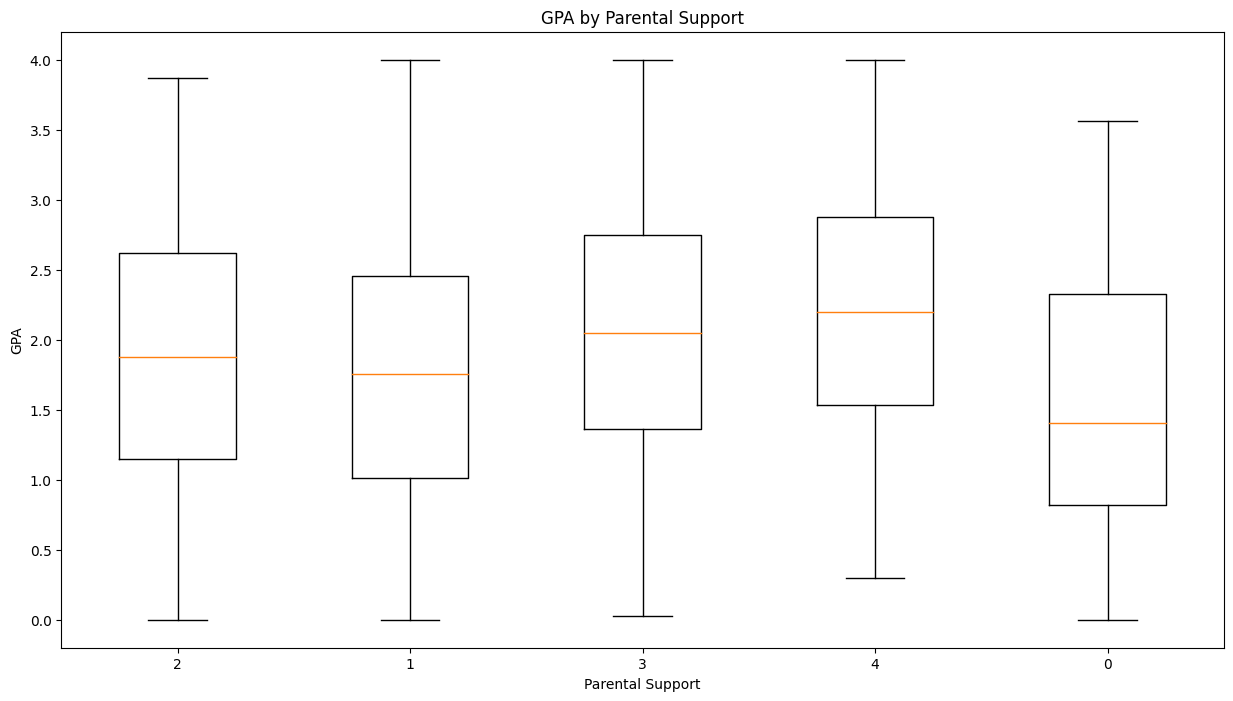

In [20]:
plt.figure(figsize=(15, 8))
box = plt.boxplot([students[students['ParentalSupport'] == level]['GPA'] 
                   for level in students['ParentalSupport'].unique()],
                  labels=students['ParentalSupport'].unique())
plt.title('GPA by Parental Support')
plt.xlabel('Parental Support')
plt.ylabel('GPA')
plt.show()

Here we notice some descrepancy between lets say parental support 4 and 0. The median GPAs seem to be differing by almost a full point. We can investigate further to verify that there is indeed something substantial on this correlation.

In [21]:
students['ParentalSupport'].value_counts()

ParentalSupport
2    740
3    697
1    489
4    254
0    212
Name: count, dtype: int64

The counts for parental support equal to 4 and 0 are fairly even while most values seem to be between 2 and 3 which is expected since this would be the "average" parental support behaviour, neither neglecting students nor being overly supportive but still supportive enough.

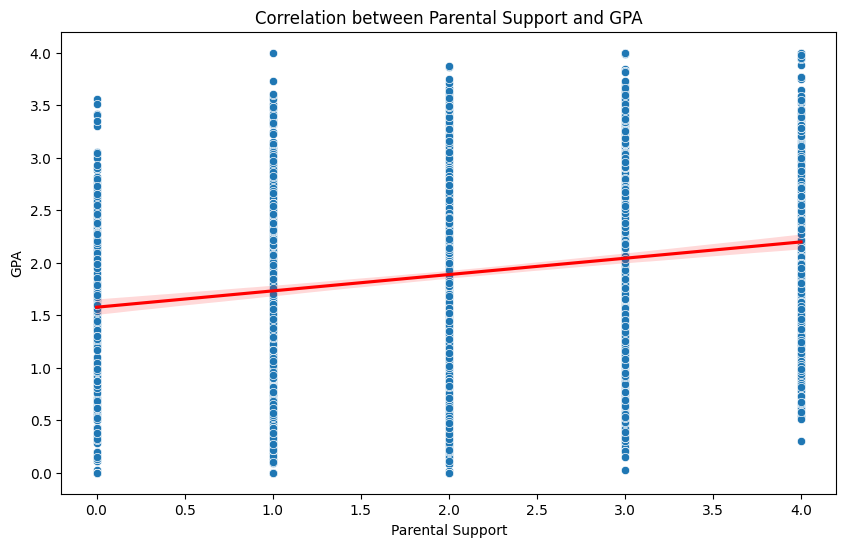

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ParentalSupport', y='GPA', data=students)
sns.regplot(x='ParentalSupport', y='GPA', data=students, scatter=False, color='red')
plt.title('Correlation between Parental Support and GPA')
plt.xlabel('Parental Support')
plt.ylabel('GPA')
plt.show()

From the above scatter plot we can see from the regression line in red that there is a positive correlation between the parental support and GPA. When one increases the other increases as well and vice versa.

We can group our data by parental support and get the mean GPAs for each group to more clearly see the differences

In [23]:
mean_gpa = students.groupby('ParentalSupport')['GPA'].mean();mean_gpa

ParentalSupport
0    1.540128
1    1.755700
2    1.884246
3    2.042409
4    2.191545
Name: GPA, dtype: float64

Another thing we could do is do a Chi-Squared Test of independence. For this we can investigate the dependency of two categorical variables. Since `GPA` is a numerical and specifically a ratio type variable, we will look at `ParentalSupport` and `GradeClass` since they are both categorical type variables (specifically ordinal).

In [24]:
contingency_table = pd.crosstab(students['ParentalSupport'], students['GradeClass'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print("Contingency Table:")
print(contingency_table)
print(f"\nChi-square statistic: {chi2}")
print(f"p-value: {p_value}")
print(f"Degrees of freedom: {dof}")

alpha = 0.05  # significance level
if p_value <= alpha:
    print("\nReject the null hypothesis.")
    print("There is a significant relationship between Parental Support and Grade Class.")
else:
    print("\nFail to reject the null hypothesis.")
    print("There is no significant evidence of a relationship between Parental Support and Grade Class.")

Contingency Table:
GradeClass       0.0  1.0  2.0  3.0  4.0
ParentalSupport                         
0                  5    8   37   32  130
1                 14   39   77   89  270
2                 16   97  125  122  380
3                 47   92  112  122  324
4                 25   33   40   49  107

Chi-square statistic: 73.78266419541622
p-value: 2.1506704168219007e-09
Degrees of freedom: 16

Reject the null hypothesis.
There is a significant relationship between Parental Support and Grade Class.


From the above we see that we rejected the null hypothesis ("There is no statistically significant relationship between the two variables") and we accept the alternative. Thus we can conclude that the two variables are related. 

You can read more about the Chi-Squared test of independence [here.](https://www.ling.upenn.edu/~clight/chisquared.htm)

Are they positively or negatively correlated though? The Chi-Squared test of independence does not give us the answer to that question. Fortunately there are ways to determine that, for example using correlation coefficients such as Spearman's rank correlation coefficient. 

In [25]:
spearman_corr, p_value_spearman = spearmanr(students['ParentalSupport'], students['GradeClass'])
print(f"Spearman's rank correlation coefficient: {spearman_corr:.3f}")

Spearman's rank correlation coefficient: -0.126


You can read more about Spearman's rank correlation coefficient [here.](https://www.statstutor.ac.uk/resources/uploaded/spearmans.pdf)

Since our coefficient is -0.126 we can say that the two variables have a weak negative correlation. This might seem odd since we saw earlier the clear positive correlation between parental support and gpa, but I will remind you that we tested specifically the variable `GradeClass` and if you remember we mentioned it was structured in an inverse way than GPA. Hence the negative correlation here. If we extrapolate to the reverse case this is a weak positive correlation. 

"But what about other variables? Do I have to do this kind of analysis all the time? It's tedious and time consuming". I hear you. There is a faster way to check correlations between variables and the tool for that is a heatmap!

Below we can create such a heatmap with the help of the seaborn library. We can clearly see the positive and negative correlations as well as percentages. This is a lot easier and faster than the alternative.

<Axes: >

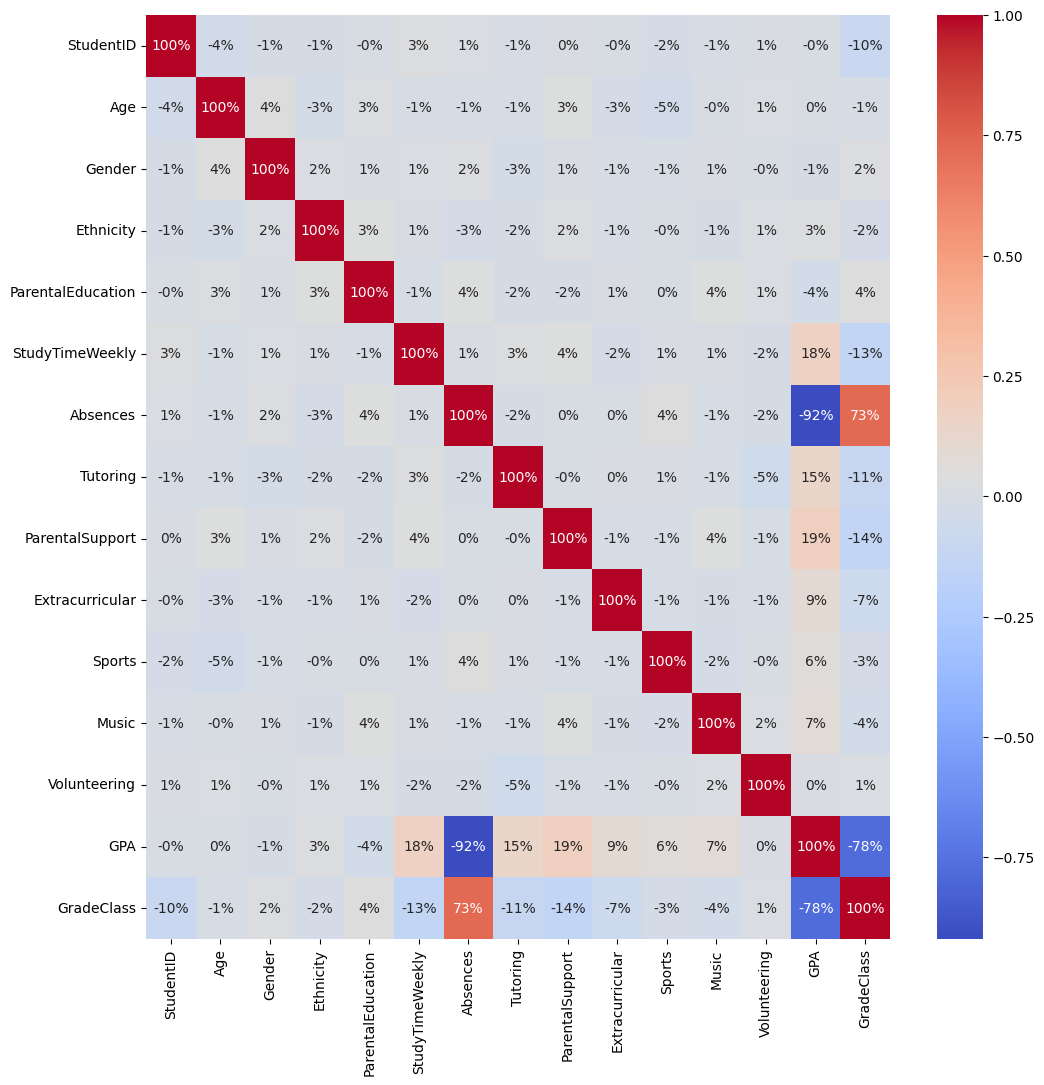

In [26]:
plt.figure(figsize=(12,12))
sns.heatmap(students.corr(),annot=True,fmt='.0%',cmap='coolwarm')

Below is the correlation matrix with all the correlation coefficients for each pair of variables.

In [27]:
correlation_matrix = students.corr();correlation_matrix

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
StudentID,1.000000,-0.042255,-0.014625,-0.012990,-0.002307,0.026976,0.014841,-0.007834,0.003016,-0.003611,-0.020703,-0.005468,0.008011,-0.002697,-0.098500
Age,-0.042255,1.000000,0.044895,-0.028473,0.025099,-0.006800,-0.011511,-0.012076,0.033197,-0.025061,-0.046320,-0.003492,0.013074,0.000275,-0.006250
Gender,-0.014625,0.044895,1.000000,0.016010,0.006771,0.011469,0.021479,-0.031597,0.008065,-0.005964,-0.008897,0.007109,-0.000200,-0.013360,0.022998
Ethnicity,-0.012990,-0.028473,0.016010,1.000000,0.033595,0.007184,-0.025712,-0.017440,0.020922,-0.008927,-0.004484,-0.014627,0.013468,0.027760,-0.023326
ParentalEducation,-0.002307,0.025099,0.006771,0.033595,1.000000,-0.011051,0.036518,-0.017340,-0.017463,0.007479,0.002029,0.039439,0.011960,-0.035854,0.041031
StudyTimeWeekly,0.026976,-0.006800,0.011469,0.007184,-0.011051,1.000000,0.009326,0.028930,0.035800,-0.022860,0.006836,0.007791,-0.016604,0.179275,-0.134131
Absences,0.014841,-0.011511,0.021479,-0.025712,0.036518,0.009326,1.000000,-0.015534,0.002108,0.000360,0.041454,-0.008692,-0.018528,-0.919314,0.728633
Tutoring,-0.007834,-0.012076,-0.031597,-0.017440,-0.017340,0.028930,-0.015534,1.000000,-0.000824,0.004865,0.006278,-0.011385,-0.050898,0.145119,-0.111695
ParentalSupport,0.003016,0.033197,0.008065,0.020922,-0.017463,0.035800,0.002108,-0.000824,1.000000,-0.008381,-0.006176,0.035122,-0.006036,0.190774,-0.136823
Extracurricular,-0.003611,-0.025061,-0.005964,-0.008927,0.007479,-0.022860,0.000360,0.004865,-0.008381,1.000000,-0.011820,-0.014191,-0.007427,0.094078,-0.069733


# Machine Learning Modeling

Now that we have a good idea of how our data is structured and how variables are correlated, it's time to think about creating a machine learning model. Our goal is to predict the GPA of a student based on the other variables. Since we already have the GPA values this is a supervised learning task. We have the training data with labels for our target variable and we want to predict it.

## Preprocessing data

We will need to seperate categorical and numerical variables and preprocess them using an encoder for the first (meaning we split the values to different variables so we have 0s and 1s only) and standardize by removing the mean and scaling to unit variance for the second.

Here is the documentation for both methods for further reading.

[OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

[StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [28]:
categorical_vars = ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 
                    'Extracurricular', 'Sports', 'Music', 'Volunteering']
numerical_vars = ['Age', 'StudyTimeWeekly', 'Absences']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_vars),
        ('cat', OneHotEncoder(), categorical_vars)
    ])

## Building models

Now that we have defined the preprocessor that will do the encoding and scaling of our data, we want to split the data into training and test sets. Below we select `y` as our target variable `GPA` and `X` for our features where we drop `GPA` since its our target variable, `GradeClass` since this is essentially a categorical version of our target variable and `StudentID` since it is not useful information. 

We proceed then to split the data using 80% of the total data for training and 20% for testing.

In [29]:
X = students.drop(columns=['GPA', 'GradeClass', 'StudentID'])
y = students['GPA']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)

The first model we are gonna test is a Linear Regression Model. This model will try to fit the best line (hence linear) in our training data using the method of least squares. The primary objective of Linear Regression is to minimize the difference between the observed values and the values predicted by the model. Specifically, it seeks to find the coefficients (or weights) that minimize the sum of the squared differences (residuals) between the actual target values and the predicted values across all training samples. This approach assumes a linear relationship between the input features and the target variable. By fitting this line, the model provides a straightforward interpretation of how each feature influences the target variable.

For further reading on Linear Regression check [here.](https://www.ibm.com/topics/linear-regression)

We will use a pipeline to preprocess our data using our preprocessor and using the LinearRegression classifier. We then fit our model to the training data. After that we can use the model to make predictions on the test set and we can check on the model's performance with metrics like Mean Absolute Error (MAE) and Coefficient of Determination (R-squared).

In [30]:
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LinearRegression())
])

lr_pipeline.fit(X_train, y_train)

y_skpred = lr_pipeline.predict(X_test)
mae_sk = mean_absolute_error(y_test, y_skpred)
r2_sk = r2_score(y_test, y_skpred)

print(f"Linear Regression MAE: {mae_sk:.4f}")
print(f"Linear Regression R-squared: {r2_sk:.3f}")

Linear Regression MAE: 0.1643
Linear Regression R-squared: 0.951


Mean Absolute Error (MAE) represents the average of the absolute differences between the predicted values and the actual values. In our case the MAE is 0.1643 which means that on average the predicted values deviate from the actual values by this amount.

Coefficient of Determination (R-squared) measures how well the variability in the target variable is explained by the variability in the predictors (features). An R-squared value of 95.1% means that the model explains 95.1% of the variance in the target variable. This high R-squared value suggests that the model fits the data very well and captures most of the variability in the target variable.

Let's try a different model. How about XGB? We use the same process. Split our data, use a pipeline with processor and the correct regressor, we fit our model to our training data and then make predictions and evaluations with MAE and R-squared.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', xgb.XGBRegressor(objective='reg:squarederror', random_state=31))
])

xgb_pipeline.fit(X_train, y_train)

y_xgbpred = xgb_pipeline.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_xgbpred)
r2_xgb = r2_score(y_test, y_xgbpred)

print(f"XGB MAE: {mae_xgb:.4f}")
print(f"XGB R-squared: {r2_xgb:.4f}")

XGB MAE: 0.2014
XGB R-squared: 0.9242


We notice we have higher MAE and lower R-squared. This means that the XGB model does not fit our data as well as the Linear Regression one.

We can also try a Random Forest model using the same process as before.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=31))
])

rf_pipeline.fit(X_train, y_train)
y_rf_pred = rf_pipeline.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_rf_pred)
r2_rf = r2_score(y_test, y_rf_pred)

print(f"Random Forest MAE: {mae_rf:.4f}")
print(f"Random Forest R-squared: {r2_rf:.4f}")

Random Forest MAE: 0.2079
Random Forest R-squared: 0.9199


Again this worse than the Linear Regression model and also worse than the XGB model.

"What about all the talk about training models and watching the epochs as the model trains?" 

This refers to neural network training. We define a custom architecture for a neural network, which starts with an input layer and ends with an output layer that provides the prediction. The size of both layers depends on the input data and the output requirements. In our case, the output layer will have 1 neuron to predict the GPA score of the student. 

Between the input and output layers are what are called hidden layers. These hidden layers perform calculations to transform inputs into outputs in a sequential (feedforward) manner. Each hidden layer processes the information received from the previous layer and passes it to the next layer until it reaches the output layer. The network learns to adjust the weights of these connections through training (using backpropagation) over multiple epochs to minimize the error in its predictions.

For further reading on Neural Networks check [here.](https://www.ibm.com/topics/neural-networks)

I am providing a custom made sequential architecture consisting of an input layer, two hidden layers with ReLU activation functions, and an output layer. The hidden layers include Batch Normalization and Dropout to improve generalization and reduce overfitting. The model is compiled with the Adam optimizer and Mean Squared Error (MSE) as the loss function, and it is trained for 100 epochs with a batch size of 32, using 20% of the data as a validation set.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32)

Epoch 1/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 5.9932 - mae: 2.0510 - val_loss: 3.1245 - val_mae: 1.6062
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.6588 - mae: 1.5999 - val_loss: 2.4453 - val_mae: 1.4240
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.7572 - mae: 1.3763 - val_loss: 1.8837 - val_mae: 1.2423
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1202 - mae: 1.1807 - val_loss: 1.3031 - val_mae: 1.0307
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4221 - mae: 0.9752 - val_loss: 0.8490 - val_mae: 0.8209
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1425 - mae: 0.8618 - val_loss: 0.5077 - val_mae: 0.6171
Epoch 7/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0046 - mae: 0.8032 - val_loss: 0.3409 - val_mae: 0.4900
Epoch 8/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8723 - mae: 0.7431 - val_loss: 0.2699 - val_mae: 0.4278
Epoch 9/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.750

In [34]:
test_loss, test_mae = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f'Test MAE: {test_mae:.4f}')
print(f"R-squared: {r2:.3f}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0433 - mae: 0.1664 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Test MAE: 0.1733
R-squared: 0.946


We can notice that we got performance very similar to the Linear Regression model. This can most certainly be further improved with hyperparameter tuning using methods like grid search in order to get the best possible parameters or even architecture tweaking.

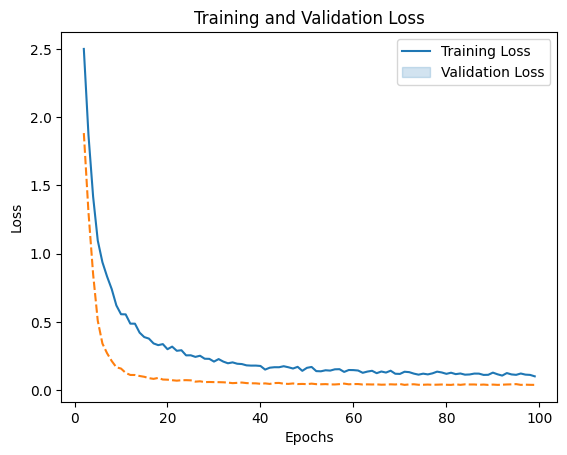

In [35]:
history_df = pd.DataFrame(history.history)
sns.lineplot(data=history_df.loc[2:, ['loss', 'val_loss']])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

The above graph shows the training and validation loss over the 100 epochs of our model training. Both losses start high but decrease rapidly in the first 20 or so epochs, with the validation loss dropping much quicker than the training loss. After the initial sharp decline, both losses continue to decrease more gradually. The validation loss remains consistently lower than the training loss throughout the training process. By the end of 100 epochs, both losses have stabilized at low values (cause of this its also worth mentioning that we could have trained the model for less than half the epochs we did with no loss in performance), with the validation loss approaching zero. This pattern suggests the model is learning effectively and generalizing well to unseen data, without obvious signs of overfitting.

In [36]:
history_df.head()

,loss,mae,val_loss,val_mae
0,5.261400,1.931144,3.124479,1.606152
1,3.300806,1.522394,2.445254,1.424013
2,2.500498,1.312130,1.883721,1.242311
3,1.869868,1.109466,1.303142,1.030741
4,1.417384,0.964681,0.848979,0.820922


## Unseen Data Prediction

And now we try to predict a completely new and unseen data point using all the models we saw thus far.

In [37]:
test_input = pd.DataFrame({
    'Age': [16],
    'Gender': [0],
    'Ethnicity': [2],
    'ParentalEducation': [4],
    'StudyTimeWeekly': [13],
    'Absences': [5],
    'Tutoring': [1],
    'ParentalSupport': [2],
    'Extracurricular': [1],
    'Sports': [0],
    'Music': [1],
    'Volunteering': [0]
})

In [38]:
lr_prediction = lr_pipeline.predict(test_input)
print(f'Linear Regression Model Predicted GPA: {lr_prediction[0]:.3f}')

Linear Regression Model Predicted GPA: 3.294


In [39]:
xgb_prediction = xgb_pipeline.predict(test_input)
print(f'XGB Model Predicted GPA: {xgb_prediction[0]:.3f}')

XGB Model Predicted GPA: 3.047


In [40]:
rf_prediction = rf_pipeline.predict(test_input)
print(f'Random Forest Model Predicted GPA: {rf_prediction[0]:.3f}')

Random Forest Model Predicted GPA: 3.086


In [41]:
input_data_processed = preprocessor.transform(test_input)
prediction = model.predict(input_data_processed)
print(f'Neural Network Predicted GPA: {prediction[0][0]:.3f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Neural Network Predicted GPA: 3.263


**DISCLAIMER**: Since this is meant to be a beginner friendly notebook, I did not try other models like SVM or GBMs, neither did I do any hyperparameter tuning or k-cross validation. All of these could have given better results than what we saw. I will leave this to a future version of this notebook or perhaps the reader could try and implement them on forked notebooks.

If you read all the way down here, I thank you for your time reading this notebook and I hope you enjoyed it, learned something new or perhaps you are ready to teach me something!